In [40]:
# Importing libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fnc

In [41]:
#importing dataset
diamonds = pd.read_csv('./input/data.csv')
diamonds = pd.DataFrame(diamonds)

In [42]:
#first check of dataset
print(diamonds.shape)
display(diamonds.head())

(40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [43]:
#data types
print(diamonds.dtypes)
## cut color and clarity need to be transformed from categorical to ordinal

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [44]:
#Checking nulls
print(diamonds.isnull().sum())
##There are no nulls

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [45]:
#describe function
diamonds.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,5.732041,5.735939,3.539537,3939.242813
std,0.474353,1.432322,2.231152,1.123169,1.152802,0.709709,4000.344155
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18823.000000


In [46]:
##parameters
#quant
quant=24
#cut
n1=3.5
#color
n2=1.9
#clarity
n3=2.7

In [47]:
##Binning price column to look at data distribution of categorical columns
labels=[float((i+1)/quant)for i in range(quant)]
diamonds['carat_bin']=pd.qcut(diamonds['carat'],quant,labels=labels)
display(diamonds)

,carat,cut,color,clarity,depth,table,x,y,z,price,carat_bin
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831,1.000000
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170,1.000000
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797,0.583333
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630,0.250000
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698,0.083333
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315,0.791667
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762,0.541667
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855,0.875000
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297,0.541667


In [48]:
diamonds['carat_bin'] = diamonds['carat_bin'].astype('float')

AxesSubplot(0.125,0.125;0.62x0.755)


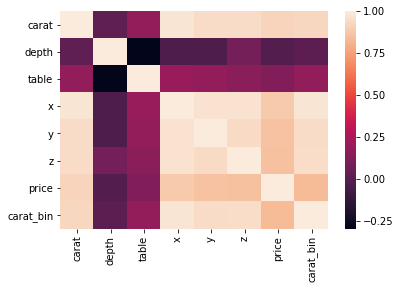

In [49]:
corr = diamonds.corr()
print(sns.heatmap(corr))
#x,y,z and carat are highly correlated. In fact carat is a product of x,y,z hence we drop x,y,z

In [50]:
diamonds.drop(['x', 'y', 'z'], axis=1, inplace=True)
display(diamonds)

,carat,cut,color,clarity,depth,table,price,carat_bin
0,2.26,Ideal,G,SI2,61.9,57.0,12831,1.000000
1,2.43,Very Good,H,SI2,63.2,57.0,16170,1.000000
2,0.80,Premium,F,SI2,61.0,57.0,2797,0.583333
3,0.40,Ideal,F,I1,63.3,60.0,630,0.250000
4,0.31,Ideal,G,VS2,61.6,55.0,698,0.083333
...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,5315,0.791667
40451,0.73,Ideal,F,VS2,62.6,56.0,2762,0.541667
40452,1.26,Very Good,I,VS1,59.2,60.0,6855,0.875000
40453,0.72,Ideal,G,SI2,61.4,56.0,2297,0.541667


In [51]:
#normalizing
columns = ['carat','depth', 'table']
for col in columns:
    diamonds[col] = (diamonds[col] - np.mean(diamonds[col])) / np.std(diamonds[col]) 
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,Ideal,G,SI2,0.106170,-0.205764,12831,1.000000
1,3.439708,Very Good,H,SI2,1.013798,-0.205764,16170,1.000000
2,0.003405,Premium,F,SI2,-0.522188,-0.205764,2797,0.583333
3,-0.839859,Ideal,F,I1,1.083616,1.138849,630,0.250000
4,-1.029593,Ideal,G,VS2,-0.103283,-1.102173,698,0.083333


In [52]:
##Let's look at categorical features different values
print(diamonds["cut"].value_counts())

Ideal        16139
Premium      10377
Very Good     9101
Good          3650
Fair          1188
Name: cut, dtype: int64


In [53]:
#converting categorical columns into numerical after consulting relathionship between these variables and prices
diamonds=fnc.cut_f(diamonds,n1)
diamonds=fnc.color_f(diamonds,n2)
diamonds=fnc.clarity_f(diamonds,n3)
diamonds["clarity"]= diamonds.clarity.apply(pd.to_numeric)

In [54]:
diamonds=pd.DataFrame(diamonds)
print(diamonds.dtypes)

carat        float64
cut          float64
color        float64
clarity      float64
depth        float64
table        float64
price          int64
carat_bin    float64
dtype: object


In [55]:
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,3.5,1.085714,0.981818,0.106170,-0.205764,12831,1.000000
1,3.439708,2.1,0.814286,0.981818,1.013798,-0.205764,16170,1.000000
2,0.003405,2.8,1.357143,0.981818,-0.522188,-0.205764,2797,0.583333
3,-0.839859,3.5,1.357143,0.736364,1.083616,1.138849,630,0.250000
4,-1.029593,3.5,1.085714,1.472727,-0.103283,-1.102173,698,0.083333


AxesSubplot(0.125,0.125;0.62x0.755)


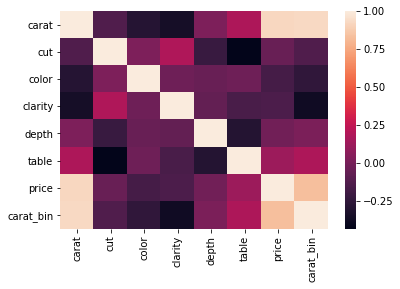

In [56]:
corr2=diamonds.corr()
print(sns.heatmap(corr2))

In [57]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,carat_bin
count,4.045500e+04,40455.000000,40455.000000,40455.000000,4.045500e+04,4.045500e+04,40455.000000,40455.000000
mean,5.058369e-17,2.733798,1.195346,1.486009,7.784970e-15,2.578363e-15,3939.242813,0.511500
std,1.000012e+00,0.779543,0.461243,0.404931,1.000012e+00,1.000012e+00,4000.344155,0.295308
min,-1.261491e+00,0.700000,0.271429,0.736364,-1.308935e+01,-6.480626e+00,326.000000,0.041667
25%,-8.398589e-01,2.100000,0.814286,1.227273,-5.221881e-01,-6.539685e-01,950.000000,0.250000
50%,-2.074106e-01,2.800000,1.085714,1.472727,3.635242e-02,-2.057641e-01,2409.000000,0.500000
75%,5.093641e-01,3.500000,1.628571,1.718182,5.250754e-01,6.906448e-01,5331.000000,0.750000
max,8.878763e+00,3.500000,1.900000,2.454545,1.204497e+01,9.654733e+00,18823.000000,1.000000


In [58]:
##saving clean data
diamonds.to_csv('./clean_diamonds.csv')

In [60]:
#importing dataset
test1 = pd.read_csv('./input/test.csv')
test1 = pd.DataFrame(test1)

In [63]:
##Binning price column to look at data distribution of categorical columns
labels=[float((i+1)/quant)for i in range(quant)]
test1['carat_bin']=pd.qcut(test1['carat'],quant,labels=labels)
test1['carat_bin'] = test1['carat_bin'].astype('float')

In [64]:
test1.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [65]:
#normalizing
columns = ['carat','depth', 'table']
for col in columns:
    test1[col] = (test1[col] - np.mean(test1[col])) / np.std(test1[col]) 
test1.head()

,id,carat,cut,color,clarity,depth,table,carat_bin
0,0,-0.500241,Ideal,I,VS2,0.241489,-1.537773,0.458333
1,1,0.535739,Ideal,G,VS2,0.101972,-0.646693,0.791667
2,2,-0.627096,Premium,E,VS2,-0.177064,-0.646693,0.333333
3,3,0.007178,Ideal,F,VS1,0.729801,-0.646693,0.583333
4,4,-0.542526,Ideal,G,VS1,-0.246823,-0.201152,0.416667


In [66]:
#converting categorical columns into numerical after consulting relathionship between these variables and prices
test1=fnc.cut_f(test1,n1)
test1=fnc.color_f(test1,n2)
test1=fnc.clarity_f(test1,n3)
test1["clarity"]= test1.clarity.apply(pd.to_numeric)

In [67]:
##saving clean data
test1.to_csv('./clean_test.csv')